In [1]:
from konlpy.tag import Okt
# Okt 객체 생성
okt = Okt()

# 분석할 텍스트
text = "안녕하세요! 저는 자연어 처리를 공부하고 있습니다."

# 형태소 분석
morphs = okt.morphs(text)
print("형태소:", morphs)

# 명사 추출
nouns = okt.nouns(text)
print("명사:", nouns)

# 품사 태깅
pos = okt.pos(text)
print("품사 태깅:", pos)

형태소: ['안녕하세요', '!', '저', '는', '자연어', '처리', '를', '공부', '하고', '있습니다', '.']
명사: ['저', '자연어', '처리', '공부']
품사 태깅: [('안녕하세요', 'Adjective'), ('!', 'Punctuation'), ('저', 'Noun'), ('는', 'Josa'), ('자연어', 'Noun'), ('처리', 'Noun'), ('를', 'Josa'), ('공부', 'Noun'), ('하고', 'Josa'), ('있습니다', 'Adjective'), ('.', 'Punctuation')]


In [2]:
import pandas as pd

df=pd.read_csv('data/프로젝트 데이터_API/상해_본문.csv')
df.head()

ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: numpy._core.multiarray failed to import

In [22]:
# issue=okt.nouns(df['판시사항'].head(10))

# 명사분석 함수 정의
def analyze_text(text):
    if isinstance(text, str):  # 입력이 문자열인지 확인
        return okt.nouns(text)
    return []

new_data = {
    'original_text': df['판시사항'],  # 원본 텍스트
    'nouns': df['판시사항'].apply(analyze_text)  # 명사 분석 결과
}

new_df = pd.DataFrame(new_data)

# 결과 출력
print(new_df)

                                          original_text  \
0       특수상해죄 및 특수협박죄의 구성요건 중 위험한 물건을 ‘휴대하여’의 의미 / 이...   
1     형사소송법 제33조 제1항 제1호에서 필요적 국선변호인 선정사유 중 하나로 정한 ‘...   
2       [1] 법원이 피해자 등을 공판기일에 출석하게 하여 형사소송법 제294조의2 제...   
3       형의 집행 및 수용자의 처우에 관한 법률에 따른 징벌을 받아 그 집행을 종료한 ...   
4       자유심증주의의 의미와 한계 및 형사재판에서 유죄의 인정을 위한 심증 형성의 정도...   
...                                                 ...   
1010                         안면에 가한 구타와 뇌출혈과의 인과관계<br/>   
1011                                  농지의 경작과 분배대상<br/>   
1012           가. 증거의 판단과 실험법칙<br/>나. 장기구속과 자백의 효력<br/>   
1013                  공소사실의 일부에 대한 공판심리 유탈과 판결의 위법<br/>   
1014                                      독직상해와 죄수<br/>   

                                                  nouns  
0     [특수, 상해죄, 및, 특수, 협박죄, 구성요건, 중, 물건, 휴대, 의, 의미, ...  
1     [형사소송법, 제, 제, 항, 제, 호, 필요, 국선변호인, 선정, 사유, 중, 하...  
2     [법원, 피해자, 등, 공판, 기일, 출석, 형사소송법, 제, 제, 항, 정, 사항...  
3     [형, 집행, 및, 수용, 자의, 처우, 관, 법률, 징벌, 그, 집행, 종료, 자...  
4

In [23]:
alllist=[]
for items in new_data['nouns']:
    for item in items:
        alllist.append(item)

unique_list=list(set(alllist)) 


In [24]:
with open("data/상해wordlist.txt", "w") as file:
    for item in unique_list:
        file.write(f"{item}\n")

In [ ]:
stopword=pd.read_csv('data/wordlist.txt', delimiter='\n', encoding='utf-8')

def remove_stopwords(words):
    return [word for word in words if word.lower() not in stopword]

# 불용어 제거
new_df['filtered_words'] = new_df['nouns'].apply(remove_stopwords)

# 결과 출력
print(new_df['filtered_words'])


In [ ]:
df1=pd.read_csv('data/프로젝트 데이터_API/사기_본문.csv')

new_data = {
    'original_text': df['판시사항'],  # 원본 텍스트
    'nouns': df['판시사항'].apply(analyze_text)  # 명사 분석 결과
}

new_df = pd.DataFrame(new_data)

# 결과 출력
print(new_df)

In [26]:
from collections import Counter

okt = Okt()
nouns = []
for doc in df['판례내용'] : #상해의 판례내용
    nouns.extend(okt.nouns(doc))
word_freq = Counter(nouns)
most_common_words = word_freq.most_common(50)
print(most_common_words)

[('피고인', 35296), ('제', 22690), ('이', 13679), ('피해자', 13618), ('소외', 13530), ('위', 12325), ('것', 12213), ('등', 12125), ('판결', 10144), ('사실', 10116), ('원심', 9406), ('그', 8742), ('수', 7637), ('사건', 7170), ('이유', 6791), ('점', 6668), ('대한', 6494), ('의', 6281), ('관', 6129), ('항', 6070), ('및', 5806), ('행위', 5642), ('인정', 5551), ('진술', 5093), ('범죄', 5031), ('각', 4961), ('선고', 4724), ('판단', 4240), ('범행', 4238), ('대하', 3992), ('증거', 3693), ('상고', 3672), ('중', 3657), ('형법', 3595), ('부분', 3527), ('처벌', 3213), ('경우', 3145), ('상해', 3142), ('호', 3136), ('형', 2967), ('경', 2941), ('죄', 2790), ('인', 2788), ('주장', 2734), ('법률', 2687), ('폭행', 2534), ('은', 2466), ('고', 2439), ('기재', 2416), ('기록', 2329)]


In [48]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

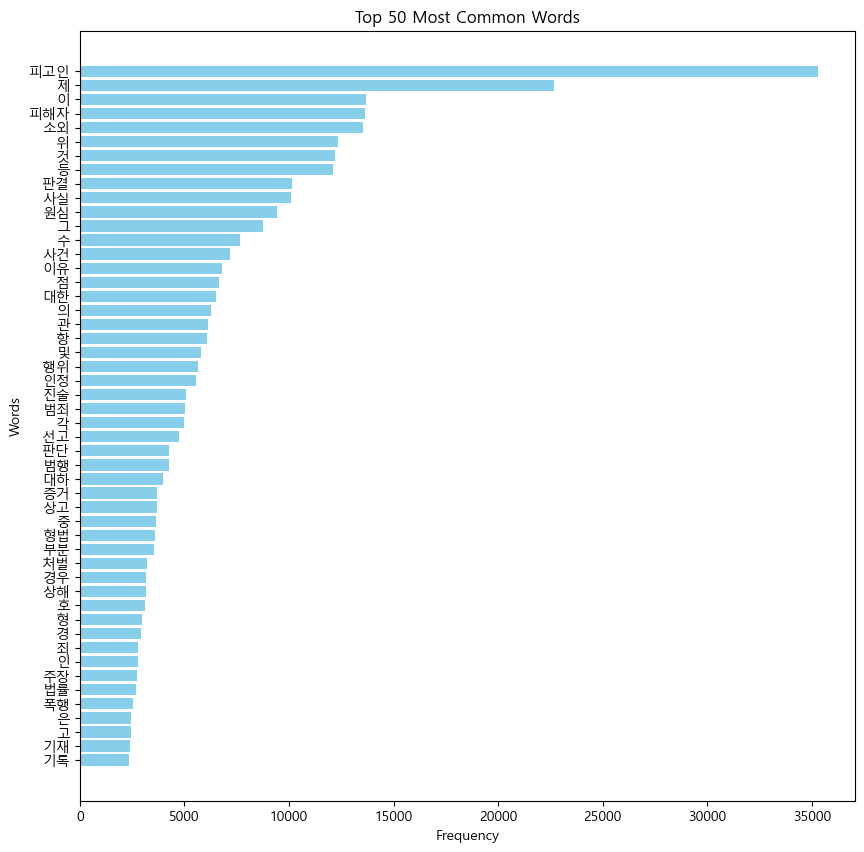

In [54]:
words, frequency = zip(*most_common_words)
plt.figure(figsize=(10,10))
plt.barh(words,frequency,color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Common Words')
plt.gca().invert_yaxis()
plt.show()

In [55]:
with open("data/상해wordlist.txt", "w") as file:
    for item in word_freq:
        file.write(f"{item}\n")

In [ ]:
df=pd.read_csv('data/원하는파일.csv')
okt = Okt()
nouns = []
for doc in df['판례내용'] : #상해의 판례내용
    nouns.extend(okt.nouns(doc))
word_freq = Counter(nouns)

with open("data/wordlist.txt", "w") as file:
    for item in word_freq:
        file.write(f"{item}\n")

# LDA

In [7]:
import sys
print(sys.path)

['c:\\Users\\user\\anaconda3\\envs\\myenv\\python312.zip', 'c:\\Users\\user\\anaconda3\\envs\\myenv\\DLLs', 'c:\\Users\\user\\anaconda3\\envs\\myenv\\Lib', 'c:\\Users\\user\\anaconda3\\envs\\myenv', '', 'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Users\\user\\anaconda3\\envs\\myenv\\Lib\\site-packages', 'c:\\Users\\user\\anaconda3\\envs\\myenv\\Lib\\site-packages\\kobert_transformers-0.6.0-py3.12.egg', 'c:\\Users\\user\\anaconda3\\envs\\myenv\\Lib\\site-packages\\setuptools\\_vendor']


In [8]:
from sklearn.decomposition import LatentDirichletAllocation


ImportError: cannot import name 'get_config' from 'sklearn' (unknown location)

In [72]:
import numpy
import sklearn
print(numpy.__version__)
print(sklearn.__version__)

2.1.2
1.5.1


In [69]:
from scikit_learn.decomposition import LatentDirichletAllocation
from scikit_learn.feature_extraction.text import CountVectorizer

# 문서 리스트
documents = [
    "Topic modeling is a technique for uncovering the hidden thematic structure in a collection of documents.",
    "LDA is a generative probabilistic model.",
    "This is a sample document for LDA.",
    "Another document that talks about topic modeling."
]

# CountVectorizer로 문서 단어 행렬 생성
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(documents)

# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(doc_term_matrix)

# 주제 출력
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-4:]])

ModuleNotFoundError: No module named 'scikit_learn'